# Spherical Projections

You have something that is inherently spherical and you want to map it onto a flat sheet - how? That's a question common to 15th-century sailors and 21st-century astronomers, though they may have different priorities and accept different tradeoffs. There is no perfect answer but there have been hundreds of attempts: see https://en.wikipedia.org/wiki/List_of_map_projections for an overview.

Sailors always liked __Mercator__ projections because these keep directions correct, at the expense of mangling distances at high latitudes and making the poles invisible.

For representing the whole sky, astronomers have a variety of alternatives. Several are built into Matplotlib as standard, and there are some specialist packages to make them easier to use in astronomy.

## Contents

- [Plotting with Matplotlib](#matplotlib)
- [Plotting with astroML](#astroML)
- [Plotting with healpy](#healpy)
- [References](#refs)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

<a id='matplotlib'></a>   

## Plotting with Matplotlib

List what Matplotlib knows about:

In [23]:
from matplotlib.projections import get_projection_names
proj = get_projection_names()
display(proj)

['aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear']

That needs a bit more explanation.

___Aitoff___ and ___Hammer___ : these and a slew of variants are similar pseudoazimuthal prpojections within a 2:1 ellipse.

___Mollweide___ : looks superficially similar to Aitoff and Hammer, but a pseudocylindrical projection keeps the lines of latitude straight. Recently very popular with cosmologists displaying CMB data (WMAP, Planck, etc), so it comes as a shock to find it was invented in 1805.

___Lambert___ : one of several with similar names, but Matplotlib seems to use 'Lambert azimuthal equal-area'. Circular outline, both poles facing forward.

___Polar___ and ___Rectilinear___ : have mainly non-astronomical uses.

For demonstration plots, start by generating some artificial data. I got the code from https://mail.python.org/pipermail/astropy/2013-June/002253.html

In [67]:
# the spot to plot
x = np.array([-37, 88, -137, -139, -136, -44]) # longitude
y = np.array([27, -60, -1.4, -50, -77, -46]) # latitude
lab = ['TF0.1', 'TF0.2', 'TF0.3', 'TF0.4', 'TF0.5', 'TF0.6' ]

# To plot the celestial equator in galactic coordinates
degtorad = pi/180.
alpha = np.arange(-180,180.,1.)
alpha *= degtorad
# From Meeus, Astronomical algorithms (with delta = 0)
x1 = np.sin(192.25*degtorad - alpha)
x2 = np.cos(192.25*degtorad - alpha)*np.sin(27.4*degtorad)
yy = np.arctan2(x1, x2)
longitude = 303*degtorad - yy 
x3 = np.cos(27.4*degtorad) * np.cos(192.25*degtorad - alpha)
latitude  = np.arcsin(x3)

# We put the angles in the right direction
for i in range(0,len(alpha)):
    if longitude[i] > 2.*pi:
        longitude[i] -= 2.*pi
    longitude[i] -= pi
    latitude[i] = -latitude[i]

# To avoid a line in the middle of the plot (the curve must not loop)
for i in range(0,len(longitude)-1):
    if (longitude[i] * longitude[i+1] < 0 
        and longitude[i] > 170*degtorad 
        and longitude[i+1] < -170.*degtorad):
        indice = i
        break

# The array is put in increasing longitude 
longitude2 = np.zeros(len(longitude))
latitude2 = np.zeros(len(latitude))
longitude2[0:len(longitude)-1-indice] = longitude[indice+1:len(longitude)]
longitude2[len(longitude)-indice-1:len(longitude)] = longitude[0:indice+1]
latitude2[0:len(longitude)-1-indice] = latitude[indice+1:len(longitude)]
latitude2[len(longitude)-indice-1:len(longitude)] = latitude[0:indice+1]

xrad = x * degtorad
yrad = y * degtorad

Now show the six projections of this data. All are in Galactic coordinates, with the celestial equator shown in green.

In [82]:
# the fonts are wierd in the titles, reason unknown
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "sans-serif"

def showProjections():
    fig = plt.figure(figsize=(14,20))
    
    ax = []
    for i in range(len(proj)):
        ax.append(fig.add_subplot(3, 2, i+1, projection=proj[i]))

        ax[i].scatter(xrad,yrad)
        ax[i].plot([-pi, pi], [0,0],'r-')
        ax[i].plot([0,0],[-pi, pi], 'r-')

        # plot celestial equator
        ax[i].plot(longitude2,latitude2,'g-')

        for t in range(0,6):
            ax[i].text(xrad[t], yrad[t], lab[t])

        ax[i].set_title(proj[i], fontsize=28)
        plt.grid(True)
#     plt.tight_layout()

There is a mysterious problem with runtime warnings, which seem to appear intermittently and at random.

TODO - fix?

/home/colin/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/projections/geo.py:502: RuntimeWarning: invalid value encountered in arcsin
  c = 2.0 * np.arcsin(0.5 * p)


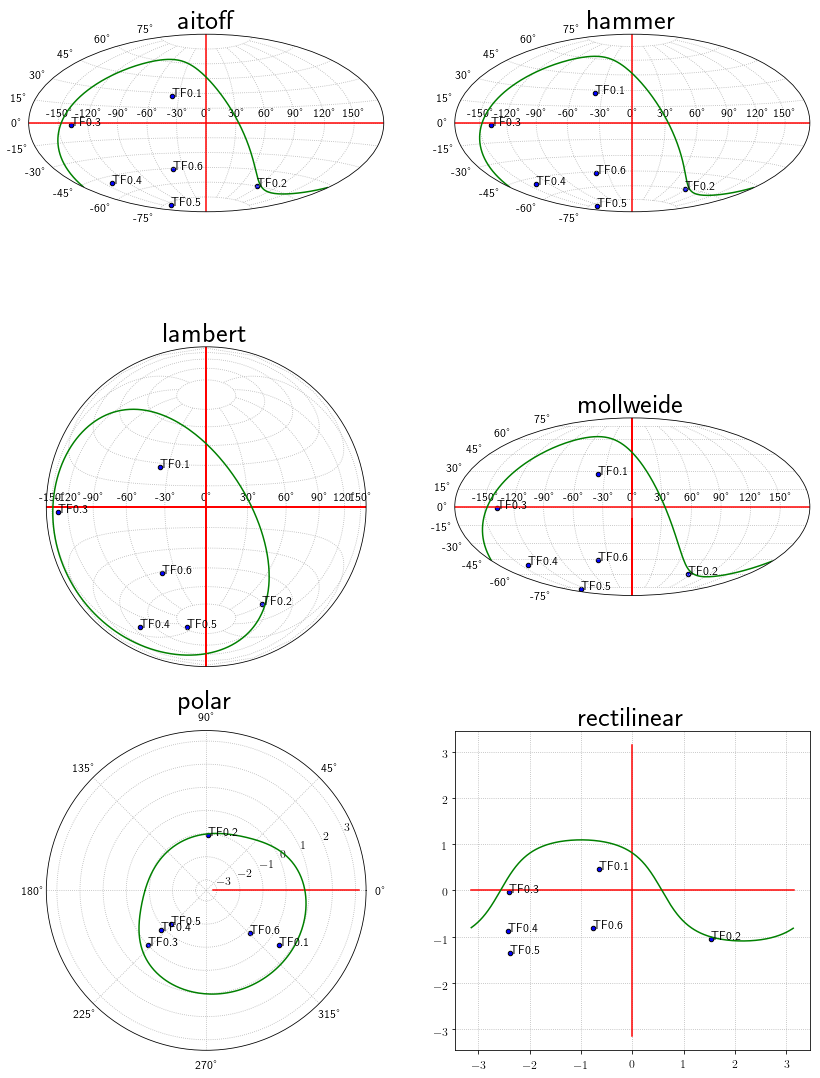

In [83]:
showProjections()

<a id='astroML'></a>   

## Plotting with astroML

This needs to be installed separately: `pip install astroML` or `conda install -c astropy astroml`.

The code is closely linked to the textbook by Ivezic et all. The next few cells were used to make Figure 1.14 in the book.

Repeat four common full-sky projections, ignoring polar and rectilinear. 

The shaded ("Tissot") ellipses represent the distortion across the sky: each is projected from a circle of radius 10 degrees on the sphere. The extent to which these are distorted and/or magnified shows the distortion inherent to the mapping.

In [71]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting import plot_tissot_ellipse

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)

In [72]:
# generate a latitude/longitude grid
circ_long = np.linspace(-np.pi, np.pi, 13)[1:-1]
circ_lat = np.linspace(-np.pi / 2, np.pi / 2, 7)[1:-1]
radius = 10 * np.pi / 180.

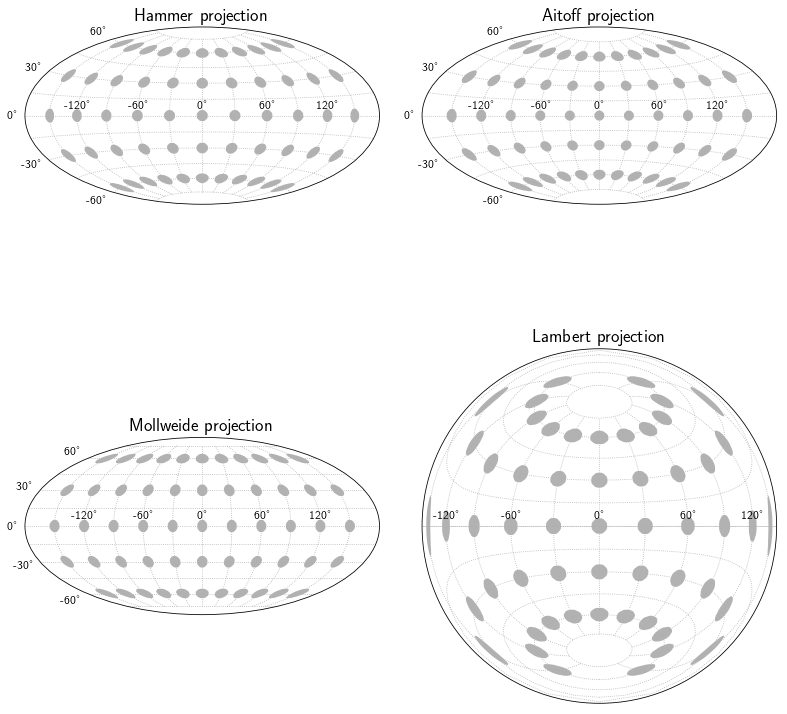

In [84]:
# Plot the built-in projections
plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0, wspace=0.12,
                    left=0.08, right=0.95,
                    bottom=0.05, top=1.0)

for (i, projection) in enumerate(['Hammer', 'Aitoff', 'Mollweide', 'Lambert']):
    ax = plt.subplot(221 + i, projection=projection.lower())

    ax.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3
                                                * np.linspace(-2, 2, 5)))
    ax.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6
                                                * np.linspace(-5, 5, 11)))
    ax.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6
                                                * np.linspace(-2, 2, 5)))
    ax.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12
                                                * np.linspace(-5, 5, 11)))

    ax.grid(True, which='minor')

    plot_tissot_ellipse(circ_long[:, None], circ_lat, radius,
                        ax=ax, fc='k', alpha=0.3, linewidth=0)
    ax.set_title('%s projection' % projection, fontsize=18)

plt.show()

<a id='healpy'></a>   

## Plotting with healpy

Healpy is a Python wrapper around the HEALPix library, and it needs to be installed separately: probably on a \*nix OS, as it seems to be still unavailable on Windows despite some attempts to port it.

To quote [the website](https://healpix.sourceforge.io/), "HEALPix is an acronym for Hierarchical Equal Area isoLatitude Pixelation of a sphere. As suggested in the name, this pixelation produces a subdivision of a spherical surface in which each pixel covers the same surface area as every other pixel."

It was originally created to support the CMB satellite missions. Functions cover FITS file I/O and spherical harmonics, as well as plotting and image manipulation.

An astroML demo shows how to use it for WMAP data. The dataset being imported here is about 24 MB, so it is cached separately from your Jupyter notebooks: by default at `~/astroML_data` though this can be configured with an environment variable.

In [88]:
import healpy as hp
from astroML.datasets import fetch_wmap_temperatures

In [89]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com

Fetch the data. There may be warning messages, but ignore them.

In [90]:
wmap_unmasked = fetch_wmap_temperatures(masked=False)
wmap_masked = fetch_wmap_temperatures(masked=True)
white_noise = np.ma.asarray(np.random.normal(0, 0.062, wmap_masked.shape))

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/colin/anaconda3/envs/ml/lib/python3.6/site-packages/healpy/fitsfunc.py:367: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


Plot the unmasked map (Mollweide projection). This is dominated by the Milky Way galaxy along the midline.

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<Figure size 864x864 with 0 Axes>

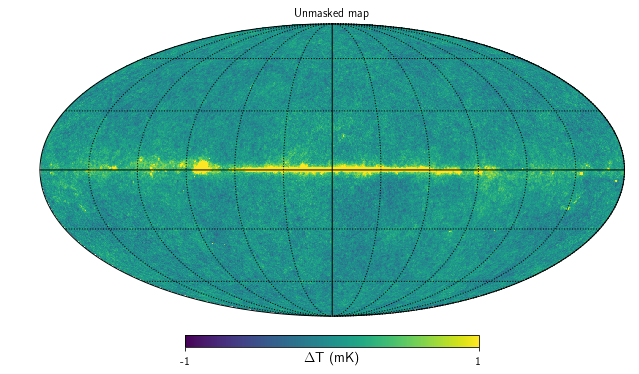

In [106]:
fig = plt.figure(figsize=(12,12))
hp.mollview(wmap_unmasked, min=-1, max=1, title='Unmasked map',
            unit=r'$\Delta$T (mK)')
hp.graticule();

Mask our galaxy and replot. Note the roughly 2-fold change of temperature scale.

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<Figure size 864x864 with 0 Axes>

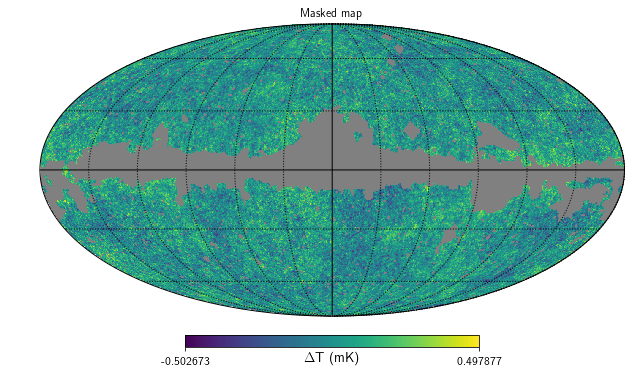

In [107]:
#  filled() fills the masked regions with a null value.
fig = plt.figure(figsize=(12,12))
hp.mollview(wmap_masked.filled(), title='Masked map',
            unit=r'$\Delta$T (mK)')
hp.graticule()

Compute and plot the power spectrum

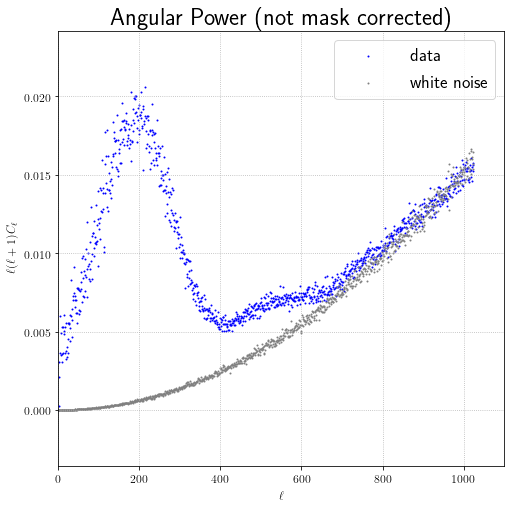

In [111]:
cl = hp.anafast(wmap_masked.filled(), lmax=1024)
ell = np.arange(len(cl))

cl_white = hp.anafast(white_noise, lmax=1024)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(ell, ell * (ell + 1) * cl,
           s=4, c='blue', lw=0,
           label='data')
ax.scatter(ell, ell * (ell + 1) * cl_white,
           s=4, c='gray', lw=0,
           label='white noise')

ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell(\ell+1)C_\ell$')
ax.set_title('Angular Power (not mask corrected)', fontsize=24)
ax.legend(loc='upper right', fontsize=18)
ax.grid()
ax.set_xlim(0, 1100);

In `mollview()`, `coord` does galactic to ecliptic coordinate transformation:

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


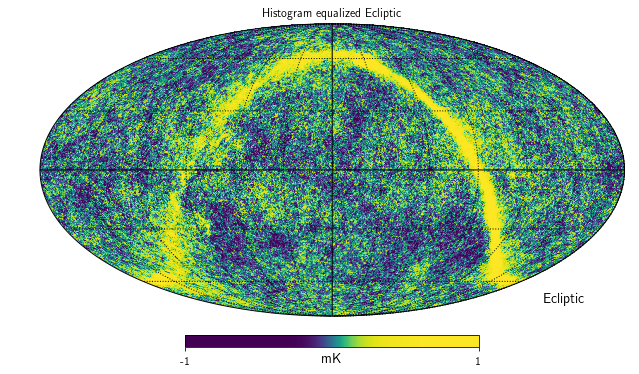

In [109]:
hp.mollview(wmap_unmasked, coord=['G','E'], title='Histogram equalized Ecliptic', 
             unit='mK', norm='hist', min=-1, max=1, xsize=2000)
hp.graticule()

<a id='refs'></a>   

## References

- Ivezic, Connolly, VanderPlas & Gray, "Statistics, Data Mining and Machine Learning in Astronomy" (2014)